In [1]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

from classes.Settings import Settings
from helpers.geometry_helpers import make_avg_fragment_if_not_exists
from helpers.helpers import read_results_alignment
from helpers.plot_functions import plot_density, plot_fragment_colored

from sklearn.cluster import KMeans

import copy

In [2]:
resultsdir_H2O = ".\\results\\H2O\\"

contact_groups = ["CF", "R2CO", "RC6H5", "RCN", "XH"]
to_count = ["F", "O", "centroid", "N", "H"]

resolutions = []
resolutions0 = np.arange(0.05, 0.1, 0.01)
resolutions1 = np.arange(0.1, 1.1, 0.1)
resolutions.extend(resolutions0)
resolutions.extend(resolutions1)

In [3]:
def make_density_plot(avg_fragment, density_df, settings):
    plotname = settings.get_density_plotname()
    fig = plt.figure()
    ax: Axes3D = fig.add_subplot(111, projection='3d')

    ax = plot_fragment_colored(ax, avg_fragment)

    p, ax = plot_density(ax=ax, df=density_df, settings=settings)

    ax.set_title("4D density plot\n Resolution: " + str(settings.resolution))

    fig.colorbar(p)
    plt.savefig(plotname)
    plt.show()

<IPython.core.display.Javascript object>


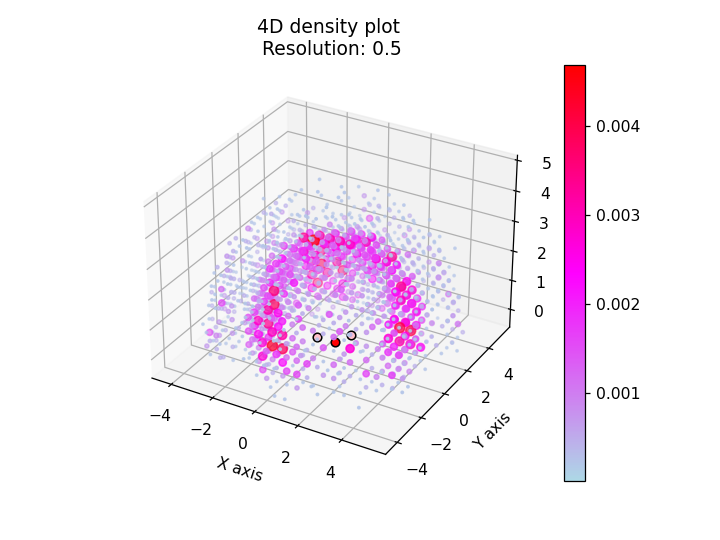

In [4]:
settings = Settings(".\\results\\H2O\\H2O_CF_vdw.5\\H2O_CF_vdw.5_aligned.csv")

# resolution of the bins, in Angstrom
settings.set_resolution(0.5)

settings.set_atom_to_count("F")
    
df = read_results_alignment(settings.get_aligned_csv_filename())
avg_fragment = make_avg_fragment_if_not_exists(settings, df)

density_df = pd.read_hdf(settings.get_density_df_filename(), settings.get_density_df_key())

make_density_plot(avg_fragment, density_df, settings)

In [5]:
amount_of_clusters = 3

In [6]:
def calc_clusters(density_df, indices, amount_of_clusters):
    density_df["cluster"] = - 1
    df = density_df.iloc[indices]

    X = np.transpose(np.array([df.x_center, df.y_center, df.z_center]))

    kmeans = KMeans(n_clusters=amount_of_clusters, random_state=1)
    kmeans.fit(X)
    
    for index, label in zip(indices[0], kmeans.labels_):
        density_df.loc[index, "cluster"] = label

    return density_df, kmeans.cluster_centers_

In [7]:
def make_cluster_plot(avg_fragment, df, settings, centroids):
    colors = ["grey", "red", "green", "blue"]

    df["cluster_color"] = [colors[i + 1] for i in list(df.cluster)]
    df = df[density_df[settings.to_count_contact + "_normalized"] > 0]

    fig = plt.figure()
    ax: Axes3D = fig.add_subplot(111, projection='3d')

    ax = plot_fragment_colored(ax, avg_fragment)
    
    greys = df[df.cluster_color == "grey"]
    rest = df[df.cluster_color != "grey"]
    
    for i, centroid in enumerate(centroids):
        volume = len(df[df.cluster == i]) * settings.resolution**3
        ax.scatter(centroid[0], centroid[1], centroid[2], s=100,\
                    label="Cluster: " + str(i+1) + " volume:" + str(volume), color=colors[i+1])
    
    ax.scatter(list(greys.x_center), list(greys.y_center), list(greys.z_center), s=0.2,
               color=list(greys.cluster_color))

    ax.scatter(list(rest.x_center), list(rest.y_center), list(rest.z_center),
               color=list(rest.cluster_color))

    ax.set_title("Clusters from density plot\n Resolution: " + str(settings.resolution))
    
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    
    ax.set_xlabel("X coordinate")
    ax.set_ylabel("Y coordinate")
    
    ax.legend(fontsize='x-small')

    plt.show()

RESOLUTION:  0.05
Datapoints: 3843.0
Total volume:  588.7856250000001
Amount non-empty bins: 3795
Volume of non-empty bins: 0.4743750000000001
1.0 40


<IPython.core.display.Javascript object>


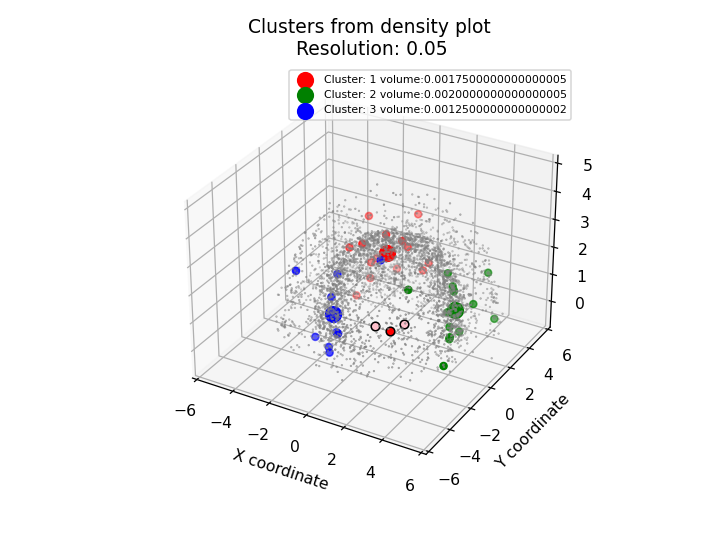

RESOLUTION:  0.06
Datapoints: 3868.0
Total volume:  590.8282559999999
Amount non-empty bins: 3805
Volume of non-empty bins: 0.8218799999999998
0.75 3805


<IPython.core.display.Javascript object>


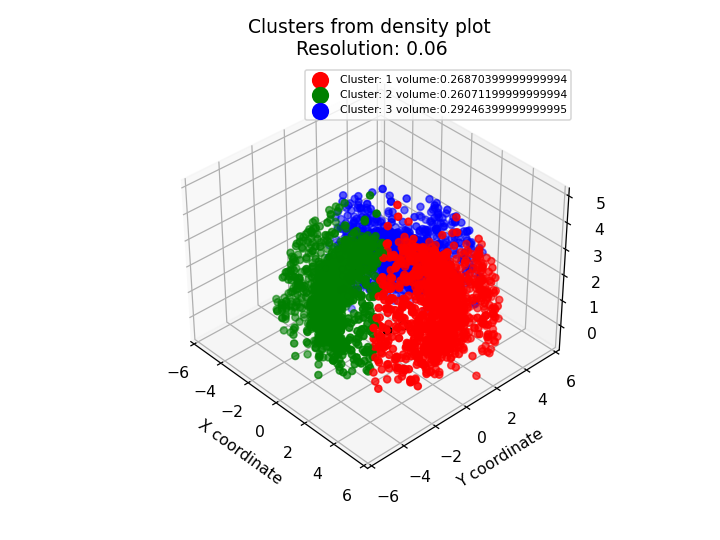

RESOLUTION:  0.07
Datapoints: 3879.0
Total volume:  596.9846400000001
Amount non-empty bins: 3798
Volume of non-empty bins: 1.3027140000000004
1.0 64


<IPython.core.display.Javascript object>


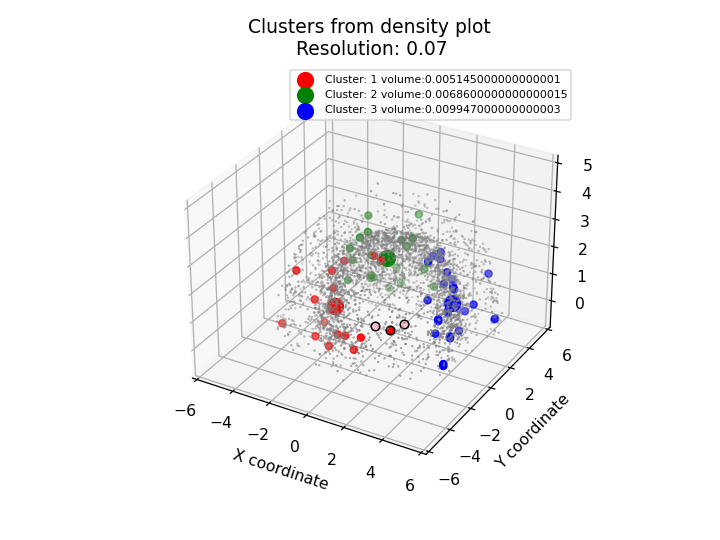

RESOLUTION:  0.08
Datapoints: 3878.0
Total volume:  596.4134400000002
Amount non-empty bins: 3787
Volume of non-empty bins: 1.9389440000000002
1.0 76


<IPython.core.display.Javascript object>


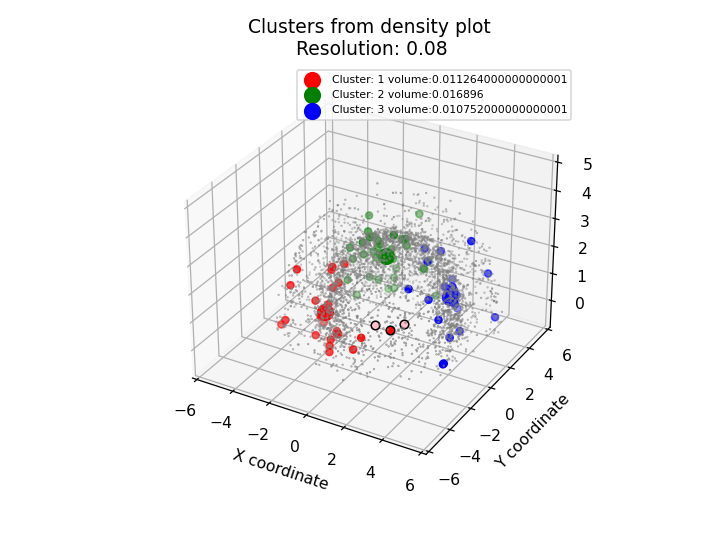

RESOLUTION:  0.09
Datapoints: 3887.0
Total volume:  592.5457799999999
Amount non-empty bins: 3762
Volume of non-empty bins: 2.742498
1.25 110


<IPython.core.display.Javascript object>


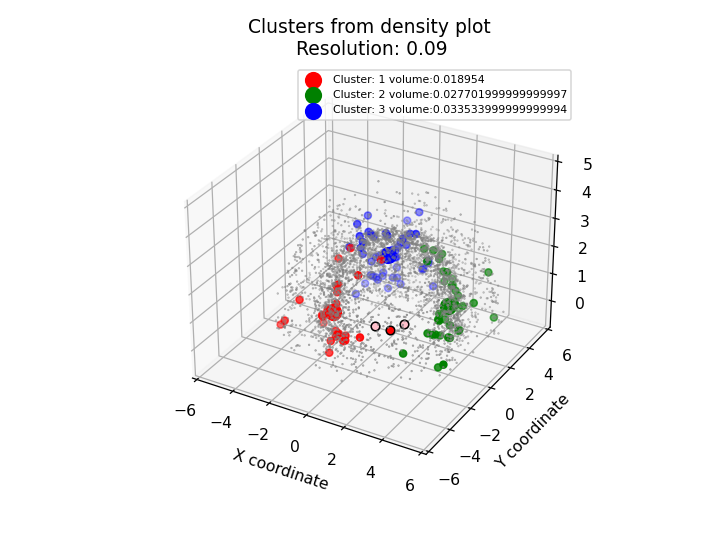

RESOLUTION:  0.1
Datapoints: 3903.0
Total volume:  599.8720000000002
Amount non-empty bins: 3753
Volume of non-empty bins: 3.753000000000001
1.5 124


<IPython.core.display.Javascript object>


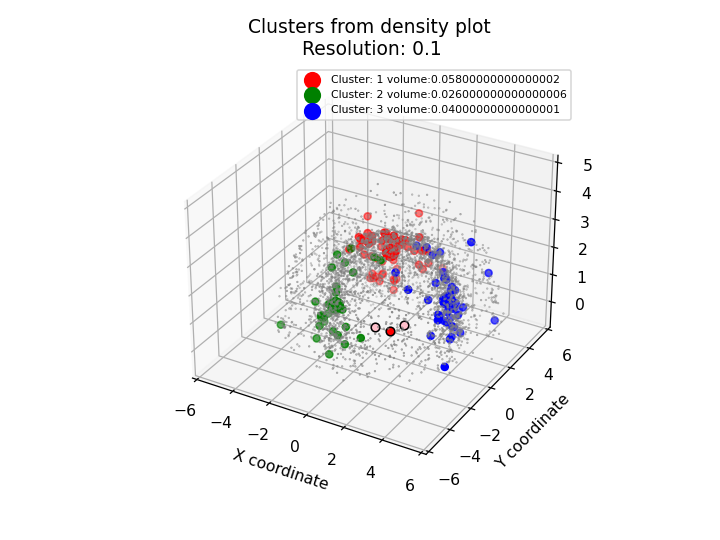

RESOLUTION:  0.2
Datapoints: 4073.0
Total volume:  605.6960000000001
Amount non-empty bins: 3347
Volume of non-empty bins: 26.776000000000007
1.75 556


<IPython.core.display.Javascript object>


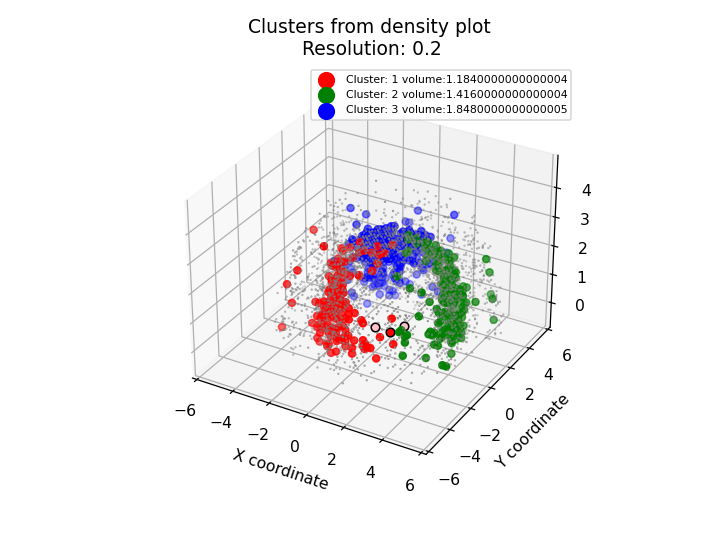

RESOLUTION:  0.3
Datapoints: 4207.0
Total volume:  628.425
Amount non-empty bins: 2621
Volume of non-empty bins: 70.767
2.5 396


<IPython.core.display.Javascript object>


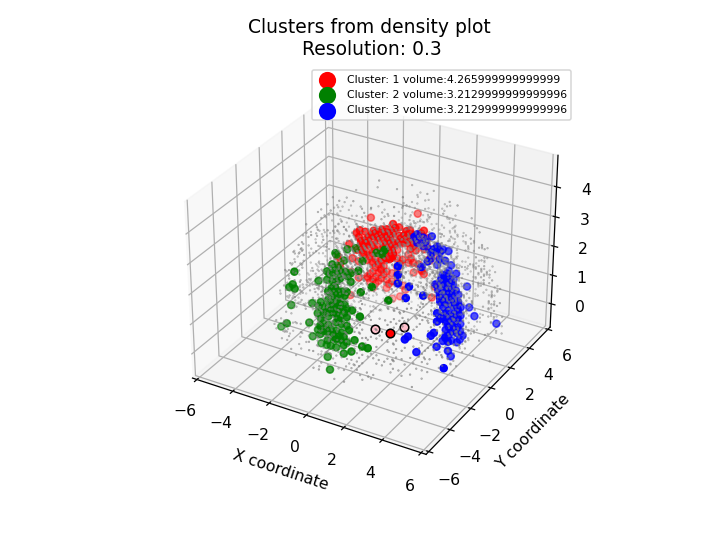

RESOLUTION:  0.4
Datapoints: 4347.0
Total volume:  673.9200000000002
Amount non-empty bins: 1930
Volume of non-empty bins: 123.52000000000002
3.75 324


<IPython.core.display.Javascript object>


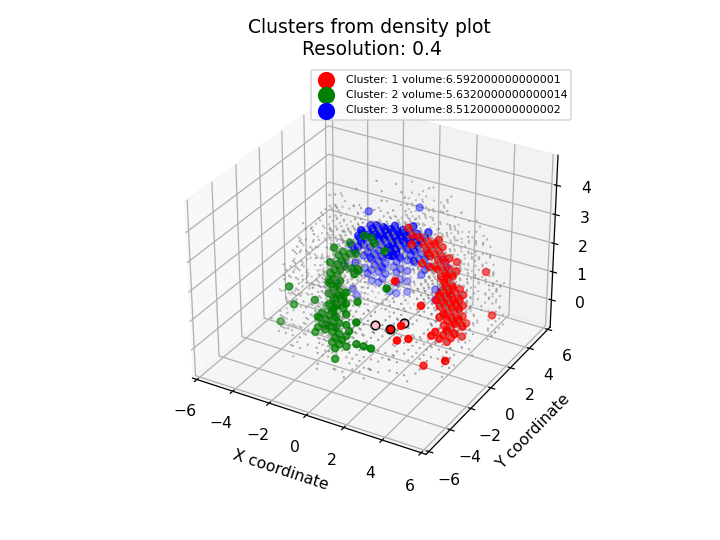

RESOLUTION:  0.5
Datapoints: 4479.0
Total volume:  661.5
Amount non-empty bins: 1439
Volume of non-empty bins: 179.875
5.25 232


<IPython.core.display.Javascript object>


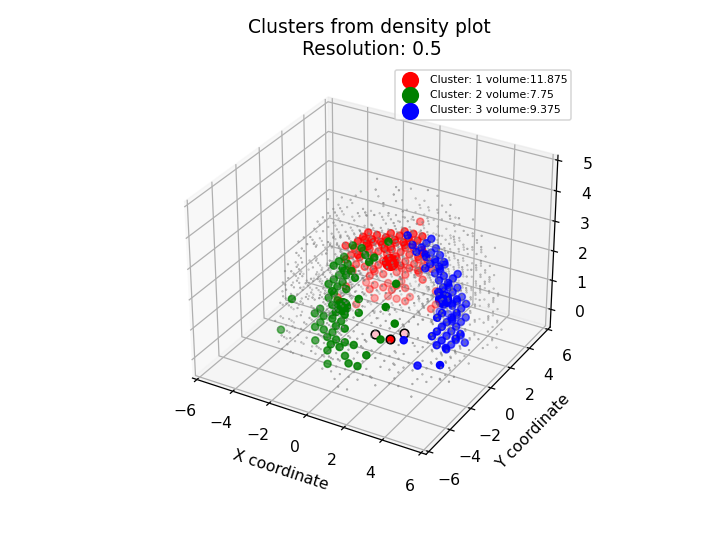

RESOLUTION:  0.6
Datapoints: 4688.0
Total volume:  699.8399999999999
Amount non-empty bins: 1111
Volume of non-empty bins: 239.97599999999997
8.25 143


<IPython.core.display.Javascript object>


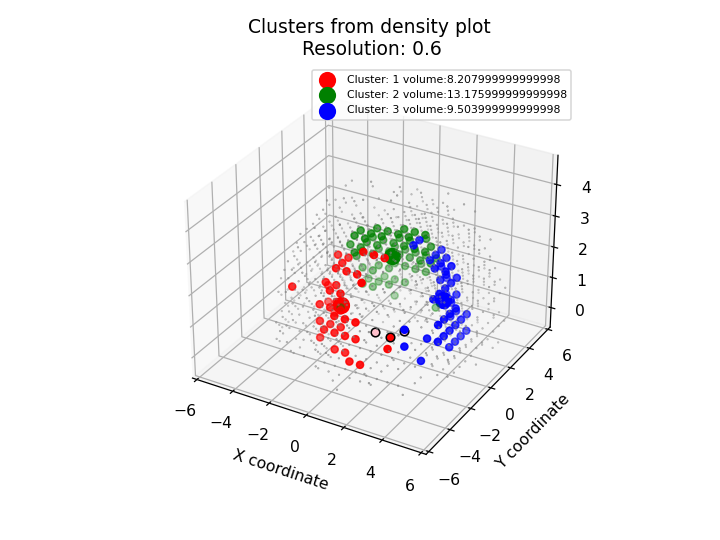

RESOLUTION:  0.7
Datapoints: 4761.0
Total volume:  790.2719999999998
Amount non-empty bins: 889
Volume of non-empty bins: 304.9269999999999
9.5 146


<IPython.core.display.Javascript object>


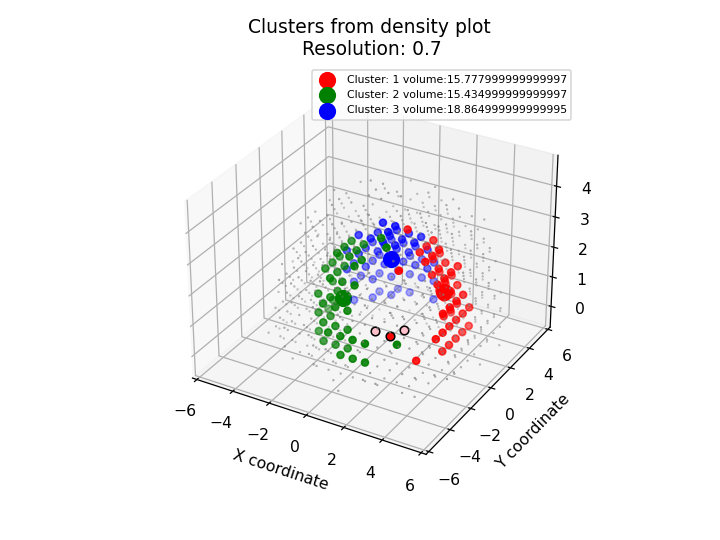

RESOLUTION:  0.8
Datapoints: 5042.0
Total volume:  802.8160000000001
Amount non-empty bins: 711
Volume of non-empty bins: 364.0320000000001
13.25 112


<IPython.core.display.Javascript object>


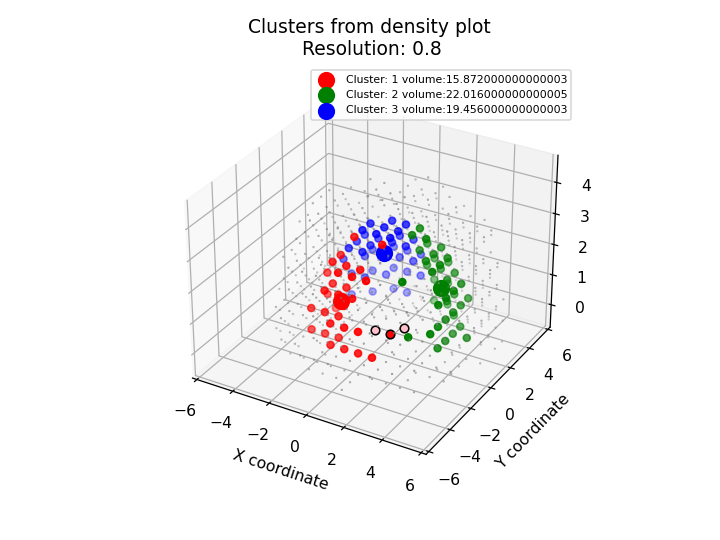

RESOLUTION:  0.9
Datapoints: 5264.0
Total volume:  734.8320000000001
Amount non-empty bins: 575
Volume of non-empty bins: 419.17500000000007
18.25 86


<IPython.core.display.Javascript object>


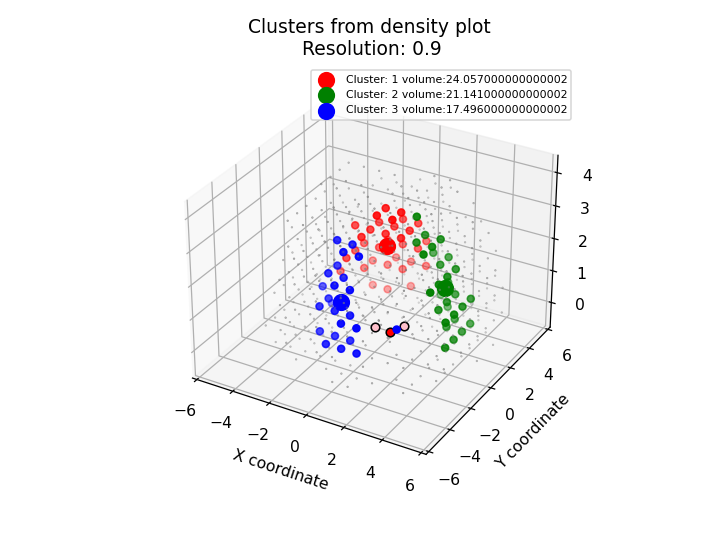

RESOLUTION:  1.0
Datapoints: 5255.0
Total volume:  1008.0
Amount non-empty bins: 469
Volume of non-empty bins: 469.0
19.25 81


<IPython.core.display.Javascript object>


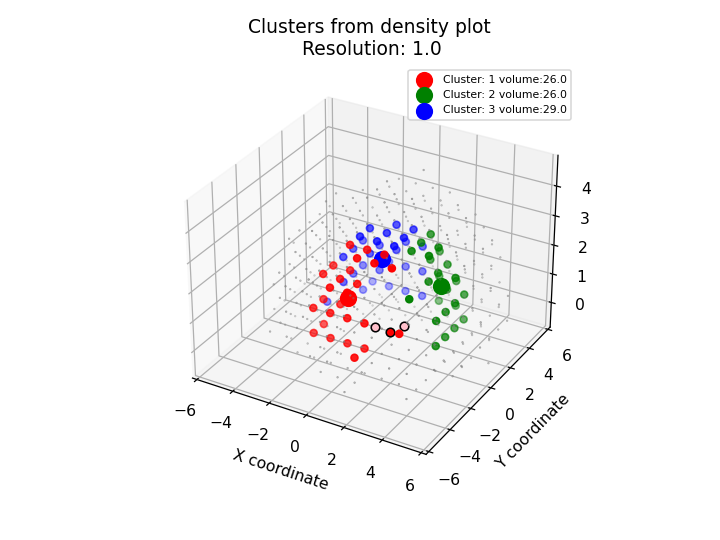

,resolution,cluster_id,centroid_x,centroid_y,centroid_z,cluster_volume,datafraction
0,0.05,3,-0.452157,1.96388,1.92371,0.00175,0.00806661
1,0.05,2,3.90882,0.751524,1.12827,0.002,0.00936768
2,0.05,1,-0.858043,-2.37129,1.09977,0.00125,0.00546448
3,0.06,2,3.19578,1.06658,1.45851,0.268704,0.328077
4,0.06,1,-0.909994,-1.81346,1.49749,0.260712,0.316184
5,0.06,3,-0.527597,2.24606,1.7233,0.292464,0.355739
6,0.07,1,-0.918608,-2.11043,1.26216,0.005145,0.00850735
7,0.07,3,-0.493334,2.06448,1.68613,0.00686,0.0121165
8,0.07,2,3.64796,0.909302,1.24754,0.009947,0.0167569
9,0.08,1,-1.29429,-2.36716,1.03808,0.011264,0.0121196


In [8]:
centroids_per_resolution = []

cluster_df = pd.DataFrame(index=range(0, len(resolutions) * amount_of_clusters),\
                           columns=["resolution", "cluster_id", "centroid_x", "centroid_y", "centroid_z",\
                                    "cluster_volume", "datafraction"])

cluster_count = 0

for resolution in resolutions:
    print("RESOLUTION: ", round(resolution, 2))
    settings.set_resolution(round(resolution, 2))
    
    density_df = pd.read_hdf(settings.get_density_df_filename(), settings.get_density_df_key())
    
    density_df["x_center"] = density_df.xstart + 0.5 * settings.resolution
    density_df["y_center"] = density_df.ystart + 0.5 * settings.resolution
    density_df["z_center"] = density_df.zstart + 0.5 * settings.resolution
    

    # normalize
    density_df.loc[:, settings.to_count_contact + "_normalized"] =\
        density_df[settings.to_count_contact] / density_df[settings.to_count_contact].sum()

    # reset cluster color for when you run this cell again
    density_df["cluster_color"] = np.nan
    
    print("Datapoints:", density_df[settings.to_count_contact].sum())
    print("Total volume: ", len(density_df) * (settings.resolution**3))
    print("Amount non-empty bins:", len(density_df[density_df[settings.to_count_contact] > 0]))
    print("Volume of non-empty bins:", len(density_df[density_df[settings.to_count_contact] > 0]) * (settings.resolution **3))
        
    # set a threshold as to determine will belong to a cluster and which ones won't
    # get the upper kwartant
    threshold = density_df[settings.to_count_contact].max() * 0.25

    indices = np.where(np.array(density_df[settings.to_count_contact]) > threshold)

    print(threshold, len(indices[0]))

    density_df, centroids = calc_clusters(density_df, indices, amount_of_clusters)

    make_cluster_plot(avg_fragment, density_df, settings, centroids)
    
    centroids_per_resolution.append(centroids)
    
    for i, centroid in enumerate(centroids):
        df = density_df

        volume = len(df[df.cluster == i]) * (settings.resolution**3)
        data_fraction = df[df.cluster == i][settings.to_count_contact + "_normalized"].sum()
        
        # specific for water
        cluster_idx = 3
        
        if centroid[1] < -0.5:
            cluster_idx = 1
        elif centroid[0] > 1.5:
            cluster_idx = 2
            
        
        cluster_df.iloc[cluster_count] = [float(resolution), cluster_idx, centroid[0], centroid[1], centroid[2], volume, data_fraction]
        
        
        cluster_count +=1
    
display(cluster_df)

<IPython.core.display.Javascript object>


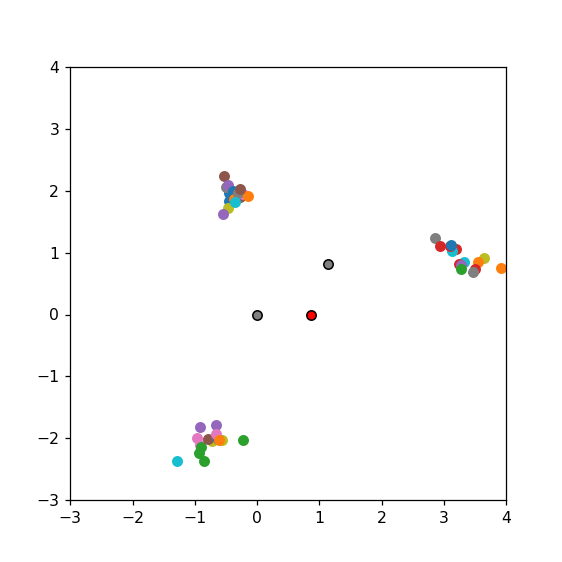

In [9]:
clusters = [[], [], []]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)

for centroids in centroids_per_resolution:
    for centroid in centroids:
        ax.scatter(centroid[0], centroid[1])

for i, row in avg_fragment.iterrows():
    if row.atom_symbol == "O":
        plt.scatter(row.atom_x, row.atom_y, edgecolor="black", color="red")
    else:
        plt.scatter(row.atom_x, row.atom_y, edgecolor="black", color="grey")

plt.xlim(-3, 4)
plt.ylim(-3, 4)
plt.show()

,cluster_volume,resolution,fraction_over_volume,datafraction
cluster_id,,,,
1.0,6.740888,0.05,0.653212,0.101942
2.0,7.692940,0.05,0.692856,0.119216
3.0,8.764300,0.05,0.674503,0.144146


<IPython.core.display.Javascript object>


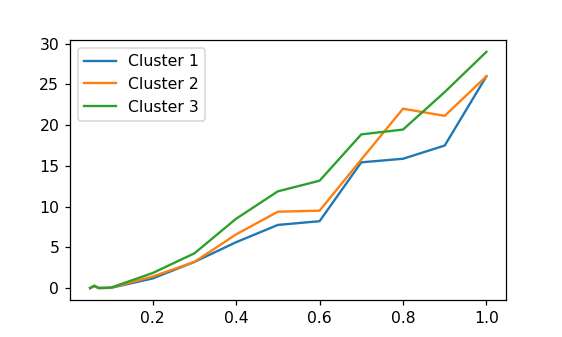

In [10]:
cluster_df = cluster_df.astype('float')
cluster_df["fraction_over_volume"] = cluster_df["datafraction"] / cluster_df["cluster_volume"]

display(cluster_df.groupby("cluster_id").agg({'cluster_volume': 'mean', 
                                              'resolution': 'first', 
                                              'fraction_over_volume': 'mean', 
                                              'datafraction': 'mean'}))

plt.figure(figsize=(5,3))
for i in range(amount_of_clusters):
    
    plt.plot(cluster_df[cluster_df["cluster_id"] == i + 1].resolution, 
         cluster_df[cluster_df["cluster_id"] == i + 1].cluster_volume, label="Cluster " + str(i+1))
    
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


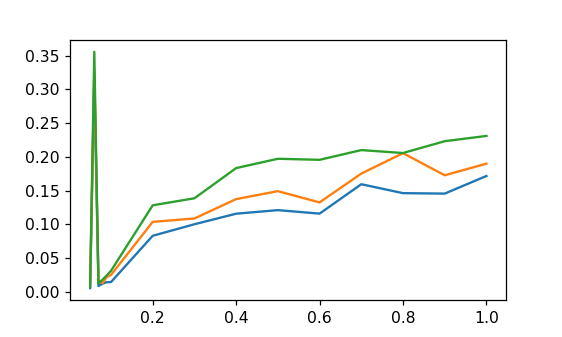

In [11]:
plt.figure(figsize=(5,3))
for i in range(amount_of_clusters):
    
    plt.plot(cluster_df[cluster_df["cluster_id"] == i + 1].resolution, 
         cluster_df[cluster_df["cluster_id"] == i + 1].datafraction)
    
plt.show()

c:\users\natas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


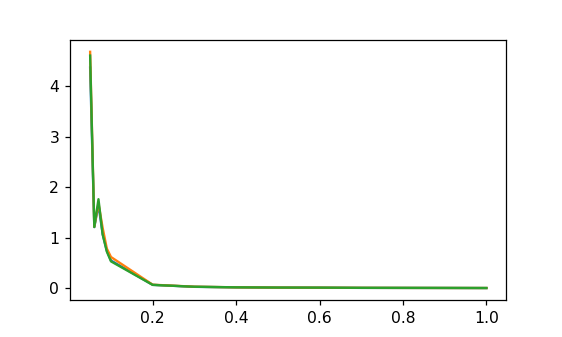

In [18]:
plt.figure(figsize=(5,3))
for i in range(amount_of_clusters):
    
    plt.plot(cluster_df[cluster_df["cluster_id"] == i + 1].resolution, 
         cluster_df[cluster_df["cluster_id"] == i + 1].fraction_over_volume)

# plt.ylim(0.0, 0.1)
plt.show()

In [13]:
display(density_df)

print(density_df.cluster.unique())

,xstart,ystart,zstart,F,x_center,y_center,z_center,F_normalized,cluster_color,cluster
0,-5.000000,-5.000000,-1.000000,0.0,-4.500000,-4.500000,-0.500000,0.0,grey,-1
1,-5.000000,-5.000000,-0.142857,0.0,-4.500000,-4.500000,0.357143,0.0,grey,-1
2,-5.000000,-5.000000,0.714286,0.0,-4.500000,-4.500000,1.214286,0.0,grey,-1
3,-5.000000,-5.000000,1.571429,0.0,-4.500000,-4.500000,2.071429,0.0,grey,-1
4,-5.000000,-5.000000,2.428571,0.0,-4.500000,-4.500000,2.928571,0.0,grey,-1
...,...,...,...,...,...,...,...,...,...,...
1003,5.083333,5.083333,0.714286,0.0,5.583333,5.583333,1.214286,0.0,grey,-1
1004,5.083333,5.083333,1.571429,0.0,5.583333,5.583333,2.071429,0.0,grey,-1
1005,5.083333,5.083333,2.428571,0.0,5.583333,5.583333,2.928571,0.0,grey,-1
1006,5.083333,5.083333,3.285714,0.0,5.583333,5.583333,3.785714,0.0,grey,-1


[-1  2  0  1]


In [14]:
df_2d = density_df.groupby(["xstart", "ystart"]).agg({'F': 'sum', 'F_normalized': 'sum', 'cluster':'mean'}).reset_index()

In [15]:
display(df_2d)

,xstart,ystart,F,F_normalized,cluster
0,-5.000000,-5.000000,0.0,0.000000,-1.0
1,-5.000000,-4.083333,0.0,0.000000,-1.0
2,-5.000000,-3.166667,0.0,0.000000,-1.0
3,-5.000000,-2.250000,2.0,0.000381,-1.0
4,-5.000000,-1.333333,9.0,0.001713,-1.0
...,...,...,...,...,...
139,5.083333,1.416667,11.0,0.002093,-1.0
140,5.083333,2.333333,7.0,0.001332,-1.0
141,5.083333,3.250000,0.0,0.000000,-1.0
142,5.083333,4.166667,0.0,0.000000,-1.0


In [16]:
meshgrid = df_2d.pivot(index='xstart', columns='ystart', values='F_normalized')
display(meshgrid)

ystart,-5.000000,-4.083333,-3.166667,-2.250000,-1.333333,-0.416667,0.500000,1.416667,2.333333,3.250000,4.166667,5.083333
xstart,,,,,,,,,,,,
-5.000000,0.000000,0.000000,0.000000,0.000381,0.001713,0.001903,0.001142,0.000190,0.000000,0.000000,0.000000,0.000000
-4.083333,0.000000,0.000190,0.004186,0.004186,0.003616,0.004757,0.003806,0.004757,0.002284,0.000190,0.000000,0.000000
-3.166667,0.000000,0.002664,0.008563,0.006660,0.010847,0.015224,0.009895,0.007612,0.004377,0.000190,0.000000,0.000000
-2.250000,0.000000,0.000381,0.012940,0.023216,0.015033,0.016746,0.016936,0.025119,0.009895,0.001713,0.000571,0.000000
-1.333333,0.000951,0.002474,0.032731,0.027783,0.010847,0.014082,0.015033,0.030828,0.027212,0.004948,0.004757,0.000000
-0.416667,0.000951,0.004948,0.027973,0.010847,0.006851,0.007231,0.014843,0.018078,0.028925,0.011798,0.004948,0.000761
0.500000,0.000761,0.007802,0.012940,0.007422,0.007231,0.007612,0.009515,0.012369,0.027212,0.010276,0.004948,0.001142
1.416667,0.000571,0.001903,0.010276,0.007422,0.002474,0.005709,0.008754,0.019220,0.020932,0.009895,0.006470,0.000190
2.333333,0.000000,0.000381,0.009134,0.010276,0.006280,0.009515,0.019791,0.023977,0.014082,0.007802,0.004377,0.000000


c:\users\natas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


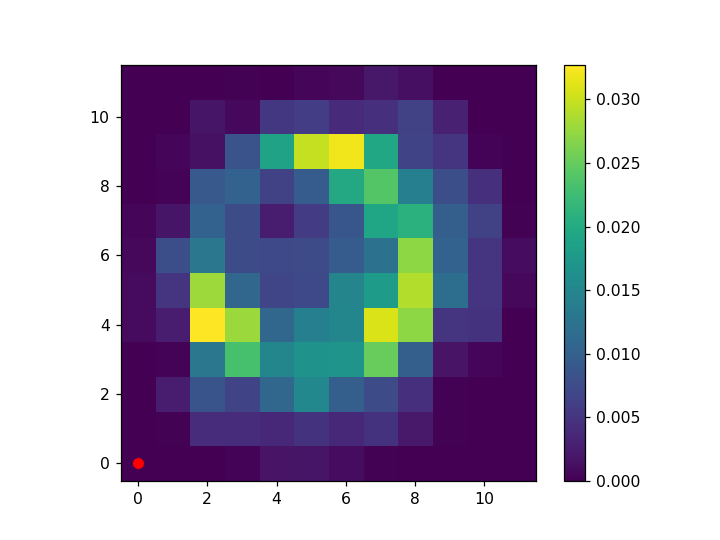

In [17]:
plt.figure()
plt.imshow(meshgrid, origin='lower')
plt.colorbar()

plt.scatter(0,0, color='red')

plt.show()